**Interactive notebook to make one time graph. Usefull to pull different dataset together and set custom filters to show relevant data.**

# Distributions (+/- treatment)

## Load data

In [101]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data, safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [102]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-07 - SeqFISH_Run6 - HeLa_R2TP1-2/"  # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-12 - SeqFISH - HeLa - Puro - R2TP1-2_Run7/" # puro
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_RT2P/"
folder_name = "distributions_puro_no_puro"

In [103]:
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["1.Run6(unt)","2.Run7(puro)"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Cell = safe_merge_no_duplicates(
        Cell,
        Detection,
        on='detection_id',
        keys='cycle'
    )
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0)

In [104]:
Cell_data = Cell_data.loc[~Cell_data['target'].str.contains('Washout')]
Cell_data = Cell_data.loc[~(Cell_data['target'].isin(['POLR2A_16', 'empty1', 'empty2']))]
Cell_data = RNA_filtering(Cell_data)
Cell_data

,quantification_id,index_mean_distance_cell,index_median_distance_cell,index_mean_distance_nuc,index_median_distance_nuc,proportion_rna_in_nuc,nb_rna_out_nuc,nb_rna_in_nuc,index_rna_protrusion,proportion_rna_protrusion,...,acquisition_id,detection_id,cluster_number,rna_number,location,cell_id,target,cycle,treatment,path
0,0,0.93,0.93,1.17,1.52,0.20,142.0,35.0,0.0,0.0,...,0,1,4,177,Location-01,0,POLR2A₀,0,1.Run6(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,38,0.88,0.88,1.17,1.49,0.15,127.0,23.0,0.0,0.0,...,0,1,2,150,Location-01,1,POLR2A₀,0,1.Run6(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,76,0.92,0.86,1.16,1.26,0.13,193.0,30.0,0.0,0.0,...,0,1,4,223,Location-01,2,POLR2A₀,0,1.Run6(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,114,1.09,1.06,1.02,1.24,0.24,181.0,57.0,0.0,0.0,...,0,1,3,238,Location-01,3,POLR2A₀,0,1.Run6(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,152,0.93,0.89,0.94,0.89,0.20,231.0,58.0,0.0,0.0,...,0,1,3,289,Location-01,4,POLR2A₀,0,1.Run6(unt),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,8873,1.13,1.12,0.62,0.46,0.25,6.0,2.0,0.0,0.0,...,116,251,0,8,Location-10,316,AGO1,12,2.Run7(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8944,8901,1.64,2.19,0.37,0.00,0.62,3.0,5.0,0.0,0.0,...,116,251,0,8,Location-10,317,AGO1,12,2.Run7(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8945,8929,1.66,2.33,0.23,0.00,0.73,3.0,8.0,0.0,0.0,...,116,251,0,11,Location-10,318,AGO1,12,2.Run7(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8946,8957,0.92,1.16,0.73,0.50,0.17,5.0,1.0,0.0,0.0,...,116,251,0,6,Location-10,319,AGO1,12,2.Run7(puro),/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


## Rename targets

optional if targets needs renaming

In [105]:
rule = {
    'POLR2A₀' : 'POLR2A', 
}

Cell_data['target'] = Cell_data['target'].replace(rule)
Cell_data['target'].unique()

array(['POLR2A', 'POLR2B', 'POLR1A', 'POLR3A', 'PCF11', 'SCAF8', 'SCAF4',
       'CHERD', 'EP400', 'INO80', 'GTF3C1', 'SRCAP', 'AGO2', 'AGO1',
       'AGO4', 'AGO3', 'SNAPC4'], dtype=object)

## Graph layout

Here customise the layout before running it for all measurements

In [106]:
import matplotlib.pyplot as plt
from Sequential_Fish.analysis.utils import get_colors_list, distribution_super_plot

In [107]:
grouped_data = Cell_data.groupby(['target', 'treatment'])['rna_number'].apply(list)
grouped_data.sort_index(level=[0,1], ascending=[True,True])

target  treatment   
AGO1    1.Run6(unt)     [74, 42, 170, 35, 91, 60, 39, 57, 50, 56, 64, ...
        2.Run7(puro)    [32, 16, 14, 17, 10, 15, 13, 23, 9, 25, 14, 14...
AGO2    1.Run6(unt)     [140, 104, 292, 80, 149, 131, 142, 98, 130, 13...
        2.Run7(puro)    [64, 62, 42, 45, 51, 34, 70, 64, 49, 75, 34, 5...
AGO3    1.Run6(unt)     [6, 20, 49, 15, 14, 14, 16, 20, 14, 16, 36, 5,...
AGO4    1.Run6(unt)     [46, 63, 148, 69, 59, 59, 72, 61, 77, 81, 137,...
CHERD   1.Run6(unt)     [95, 79, 109, 61, 76, 108, 95, 107, 85, 76, 93...
        2.Run7(puro)    [45, 42, 42, 48, 42, 40, 65, 43, 63, 73, 41, 5...
EP400   1.Run6(unt)     [61, 155, 83, 134, 70, 56, 205, 62, 109, 57, 1...
        2.Run7(puro)    [14, 18, 54, 12, 19, 12, 24, 19, 21, 15, 10, 1...
GTF3C1  1.Run6(unt)     [239, 268, 157, 174, 318, 102, 193, 141, 206, ...
        2.Run7(puro)    [137, 145, 88, 126, 77, 120, 166, 114, 143, 23...
INO80   1.Run6(unt)     [32, 59, 62, 34, 20, 60, 72, 43, 39, 25, 59, 3...
        2.Run7(pu

target  treatment   
AGO1    1.Run6(unt)     [12]
        2.Run7(puro)    [12]
AGO2    1.Run6(unt)     [12]
        2.Run7(puro)    [12]
AGO3    1.Run6(unt)     [14]
AGO4    1.Run6(unt)     [14]
CHERD   1.Run6(unt)      [6]
        2.Run7(puro)     [6]
EP400   1.Run6(unt)      [8]
        2.Run7(puro)     [8]
GTF3C1  1.Run6(unt)     [10]
        2.Run7(puro)    [10]
INO80   1.Run6(unt)      [8]
        2.Run7(puro)     [8]
PCF11   1.Run6(unt)      [4]
        2.Run7(puro)     [4]
POLR1A  1.Run6(unt)      [2]
        2.Run7(puro)     [2]
POLR2A  1.Run6(unt)      [0]
        2.Run7(puro)     [0]
POLR2B  1.Run6(unt)      [0]
        2.Run7(puro)     [0]
POLR3A  1.Run6(unt)      [2]
        2.Run7(puro)     [2]
SCAF4   1.Run6(unt)      [6]
        2.Run7(puro)     [6]
SCAF8   1.Run6(unt)      [4]
        2.Run7(puro)     [4]
SNAPC4  1.Run6(unt)     [16]
SRCAP   1.Run6(unt)     [10]
        2.Run7(puro)    [10]
Name: cycle, dtype: object
target  treatment   
AGO1    1.Run6(unt)     12
     

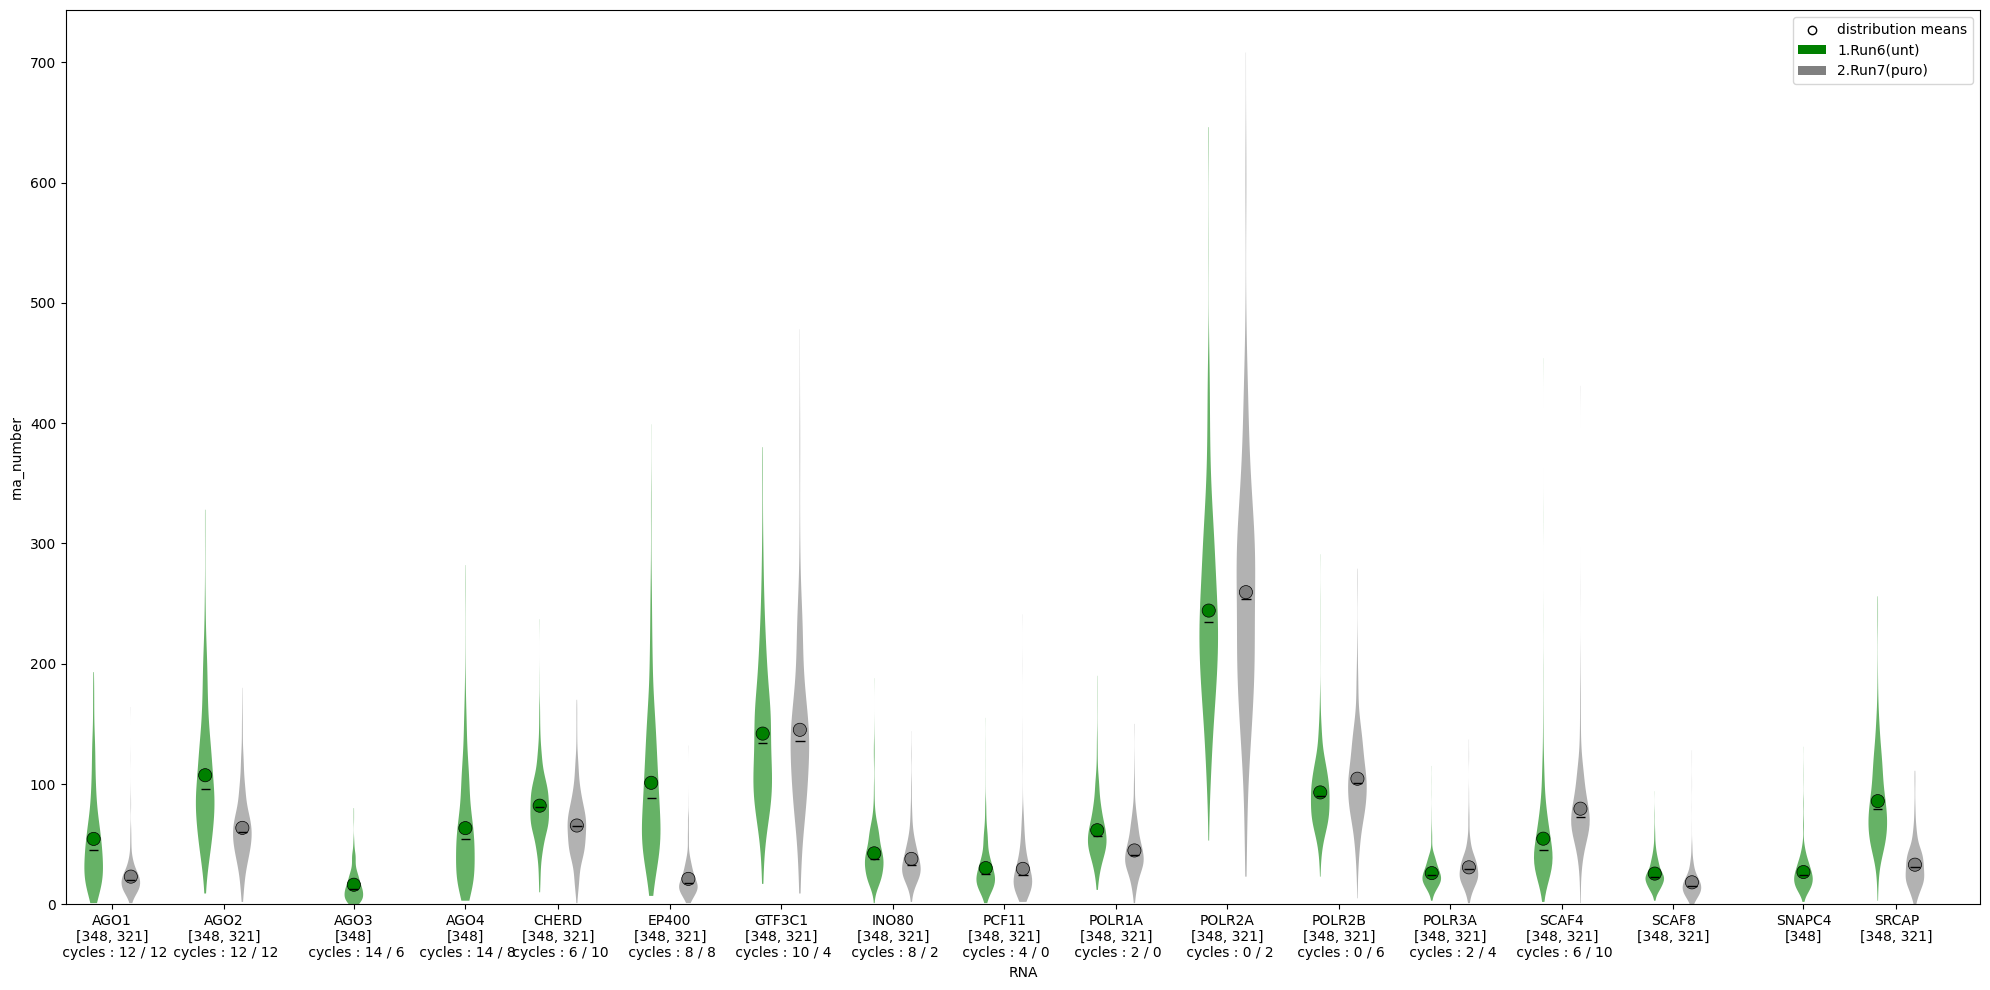

In [108]:
measure_test = 'rna_number'
def distribution_graph(
    Cell_data : pd.DataFrame,
    measure = measure_test,
) :
    
    order_ascending = [True, True]
    
    grouped_data = Cell_data.groupby(['target', 'treatment'])[measure].apply(list)
    grouped_data = grouped_data.sort_index(level=[0,1], ascending=order_ascending)
    print(Cell_data.groupby(['target', 'treatment'])['cycle'].unique())
    grouped_cycles = Cell_data.groupby(['target', 'treatment'])['cycle'].unique().apply(int)
    print(grouped_cycles)
    
    
    labels = list(grouped_data.index.get_level_values(1).unique())
    print(labels)
    
    cycles_exp1 = grouped_cycles.xs(key=labels[0],axis=0,level=1)
    cycles_exp2 = grouped_cycles.xs(key=labels[1],axis=0,level=1)
    
    fig = plt.figure(figsize=(20,10), frameon=True)
    ax = fig.gca()
    ax = distribution_super_plot(
        grouped_data,
        ax=ax,
        title='',
        xlabel='RNA',
        ylabel=measure,
        colors = ['green','gray'],
        sort_parameters = {'level' : [0,1], 'ascending' : order_ascending}
    )
    
    if 'index' in measure :
        min_x,max_x,min_y,max_y = plt.axis()
        ax.plot([min_x, max_x], [1,1], '--b')
    
    xtickslabels = ax.get_xticklabels()
    xlabels = [text.get_text() for text in xtickslabels]
    
    label_index = 0
    for label, cycle_ex1, cycle_ex2 in zip(xlabels, cycles_exp1, cycles_exp2) :
        xlabels[label_index] = label + f"\n cycles : {cycle_ex1} / {cycle_ex2}"
        label_index +=1
    
    ax.set_xticklabels(xlabels)
    
    
    plt.tight_layout()
    return fig

fig = distribution_graph(Cell_data)

## Plot all

In [109]:
# measures = []
# or :
from Sequential_Fish.analysis.analysis_parameters import distribution_measures as measures

In [110]:
os.makedirs(f"{output_path}/{folder_name}/",exist_ok=True)

for measure in measures:
    fig = distribution_graph(
        Cell_data,
        measure=measure
    )
    
    fig.savefig(f"{output_path}/{folder_name}/{measure}.svg")
    plt.close()


target  treatment   
AGO1    1.Run6(unt)     [12]
        2.Run7(puro)    [12]
AGO2    1.Run6(unt)     [12]
        2.Run7(puro)    [12]
AGO3    1.Run6(unt)     [14]
AGO4    1.Run6(unt)     [14]
CHERD   1.Run6(unt)      [6]
        2.Run7(puro)     [6]
EP400   1.Run6(unt)      [8]
        2.Run7(puro)     [8]
GTF3C1  1.Run6(unt)     [10]
        2.Run7(puro)    [10]
INO80   1.Run6(unt)      [8]
        2.Run7(puro)     [8]
PCF11   1.Run6(unt)      [4]
        2.Run7(puro)     [4]
POLR1A  1.Run6(unt)      [2]
        2.Run7(puro)     [2]
POLR2A  1.Run6(unt)      [0]
        2.Run7(puro)     [0]
POLR2B  1.Run6(unt)      [0]
        2.Run7(puro)     [0]
POLR3A  1.Run6(unt)      [2]
        2.Run7(puro)     [2]
SCAF4   1.Run6(unt)      [6]
        2.Run7(puro)     [6]
SCAF8   1.Run6(unt)      [4]
        2.Run7(puro)     [4]
SNAPC4  1.Run6(unt)     [16]
SRCAP   1.Run6(unt)     [10]
        2.Run7(puro)    [10]
Name: cycle, dtype: object
target  treatment   
AGO1    1.Run6(unt)     12
     

# Cell number

## Load data

In [111]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [112]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-07 - SeqFISH_Run6 - HeLa_R2TP1-2/"  # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-12 - SeqFISH - HeLa - Puro - R2TP1-2_Run7/" # puro

In [113]:
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated", "puro"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0)

In [114]:
Cell_data = Cell_data.loc[~Cell_data['target'].str.contains('Washout')]
Cell_data = Cell_data.loc[~(Cell_data['target'].isin(['POLR2A_16', 'empty1', 'empty2']))]
Cell_data = RNA_filtering(Cell_data)
Cell_data

,quantification_id,index_mean_distance_cell,index_median_distance_cell,index_mean_distance_nuc,index_median_distance_nuc,proportion_rna_in_nuc,nb_rna_out_nuc,nb_rna_in_nuc,index_rna_protrusion,proportion_rna_protrusion,...,nucleus_mean_median_signal,acquisition_id,detection_id,cluster_number,rna_number,location,cell_id,target,treatment,path
0,0,0.93,0.93,1.17,1.52,0.20,142.0,35.0,0.0,0.0,...,14505.0,0,1,4,177,Location-01,0,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,38,0.88,0.88,1.17,1.49,0.15,127.0,23.0,0.0,0.0,...,15458.0,0,1,2,150,Location-01,1,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,76,0.92,0.86,1.16,1.26,0.13,193.0,30.0,0.0,0.0,...,13982.5,0,1,4,223,Location-01,2,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,114,1.09,1.06,1.02,1.24,0.24,181.0,57.0,0.0,0.0,...,13675.0,0,1,3,238,Location-01,3,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,152,0.93,0.89,0.94,0.89,0.20,231.0,58.0,0.0,0.0,...,15183.0,0,1,3,289,Location-01,4,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,8873,1.13,1.12,0.62,0.46,0.25,6.0,2.0,0.0,0.0,...,20185.0,116,251,0,8,Location-10,316,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8944,8901,1.64,2.19,0.37,0.00,0.62,3.0,5.0,0.0,0.0,...,19371.0,116,251,0,8,Location-10,317,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8945,8929,1.66,2.33,0.23,0.00,0.73,3.0,8.0,0.0,0.0,...,21135.0,116,251,0,11,Location-10,318,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8946,8957,0.92,1.16,0.73,0.50,0.17,5.0,1.0,0.0,0.0,...,19651.0,116,251,0,6,Location-10,319,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


## Rename targets

optional if targets needs renaming

In [115]:
rule = {
    'POLR2A₀' : 'POLR2A', 
}

Cell_data['target'] = Cell_data['target'].replace(rule)
Cell_data['target'].unique()

array(['POLR2A', 'POLR2B', 'POLR1A', 'POLR3A', 'PCF11', 'SCAF8', 'SCAF4',
       'CHERD', 'EP400', 'INO80', 'GTF3C1', 'SRCAP', 'AGO2', 'AGO1',
       'AGO4', 'AGO3', 'SNAPC4'], dtype=object)

In [116]:
Cell_data.groupby(['treatment'], as_index=False).agg({
    'cell_id' : 'nunique'
})

,treatment,cell_id
0,puro,321
1,untreated,348


## Plot

In [117]:
import matplotlib.pyplot as plt

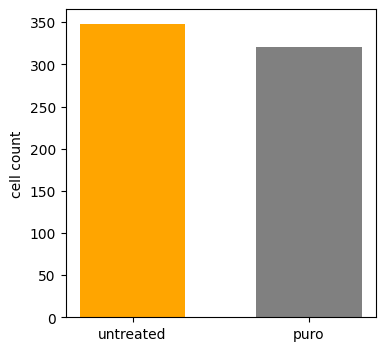

In [118]:
data = Cell_data.groupby(['treatment'], as_index=False).agg({
    'cell_id' : 'nunique'
}).sort_values('treatment', ascending=False)

cell_number_fig = plt.figure(figsize=(4,4), frameon=True)
ax = cell_number_fig.gca()
ax.bar(
    x= data['treatment'],
    height= data['cell_id'],
    color = ['orange', 'gray'],
    width=0.6
)
ax.set_ylabel('cell count')


plt.show()

### save fig

In [119]:
import os
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_RT2P/"
folder_name = ""
os.makedirs(f"{output_path}/{folder_name}/", exist_ok=True)
cell_number_fig.savefig(f"{output_path}/{folder_name}/cell_number.svg")


# Cell area

In [120]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [121]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-07 - SeqFISH_Run6 - HeLa_R2TP1-2"  # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-12 - SeqFISH - HeLa - Puro - R2TP1-2_Run7" # puro

In [122]:
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated","puro"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0)

In [123]:
Cell_data = Cell_data.loc[~Cell_data['target'].str.contains('Washout')]
Cell_data = Cell_data.loc[~(Cell_data['target'].isin(['POLR2A_16', 'empty1', 'empty2']))]
Cell_data = RNA_filtering(Cell_data)
Cell_data

,quantification_id,index_mean_distance_cell,index_median_distance_cell,index_mean_distance_nuc,index_median_distance_nuc,proportion_rna_in_nuc,nb_rna_out_nuc,nb_rna_in_nuc,index_rna_protrusion,proportion_rna_protrusion,...,nucleus_mean_median_signal,acquisition_id,detection_id,cluster_number,rna_number,location,cell_id,target,treatment,path
0,0,0.93,0.93,1.17,1.52,0.20,142.0,35.0,0.0,0.0,...,14505.0,0,1,4,177,Location-01,0,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,38,0.88,0.88,1.17,1.49,0.15,127.0,23.0,0.0,0.0,...,15458.0,0,1,2,150,Location-01,1,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,76,0.92,0.86,1.16,1.26,0.13,193.0,30.0,0.0,0.0,...,13982.5,0,1,4,223,Location-01,2,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,114,1.09,1.06,1.02,1.24,0.24,181.0,57.0,0.0,0.0,...,13675.0,0,1,3,238,Location-01,3,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,152,0.93,0.89,0.94,0.89,0.20,231.0,58.0,0.0,0.0,...,15183.0,0,1,3,289,Location-01,4,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,8873,1.13,1.12,0.62,0.46,0.25,6.0,2.0,0.0,0.0,...,20185.0,116,251,0,8,Location-10,316,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8944,8901,1.64,2.19,0.37,0.00,0.62,3.0,5.0,0.0,0.0,...,19371.0,116,251,0,8,Location-10,317,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8945,8929,1.66,2.33,0.23,0.00,0.73,3.0,8.0,0.0,0.0,...,21135.0,116,251,0,11,Location-10,318,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
8946,8957,0.92,1.16,0.73,0.50,0.17,5.0,1.0,0.0,0.0,...,19651.0,116,251,0,6,Location-10,319,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


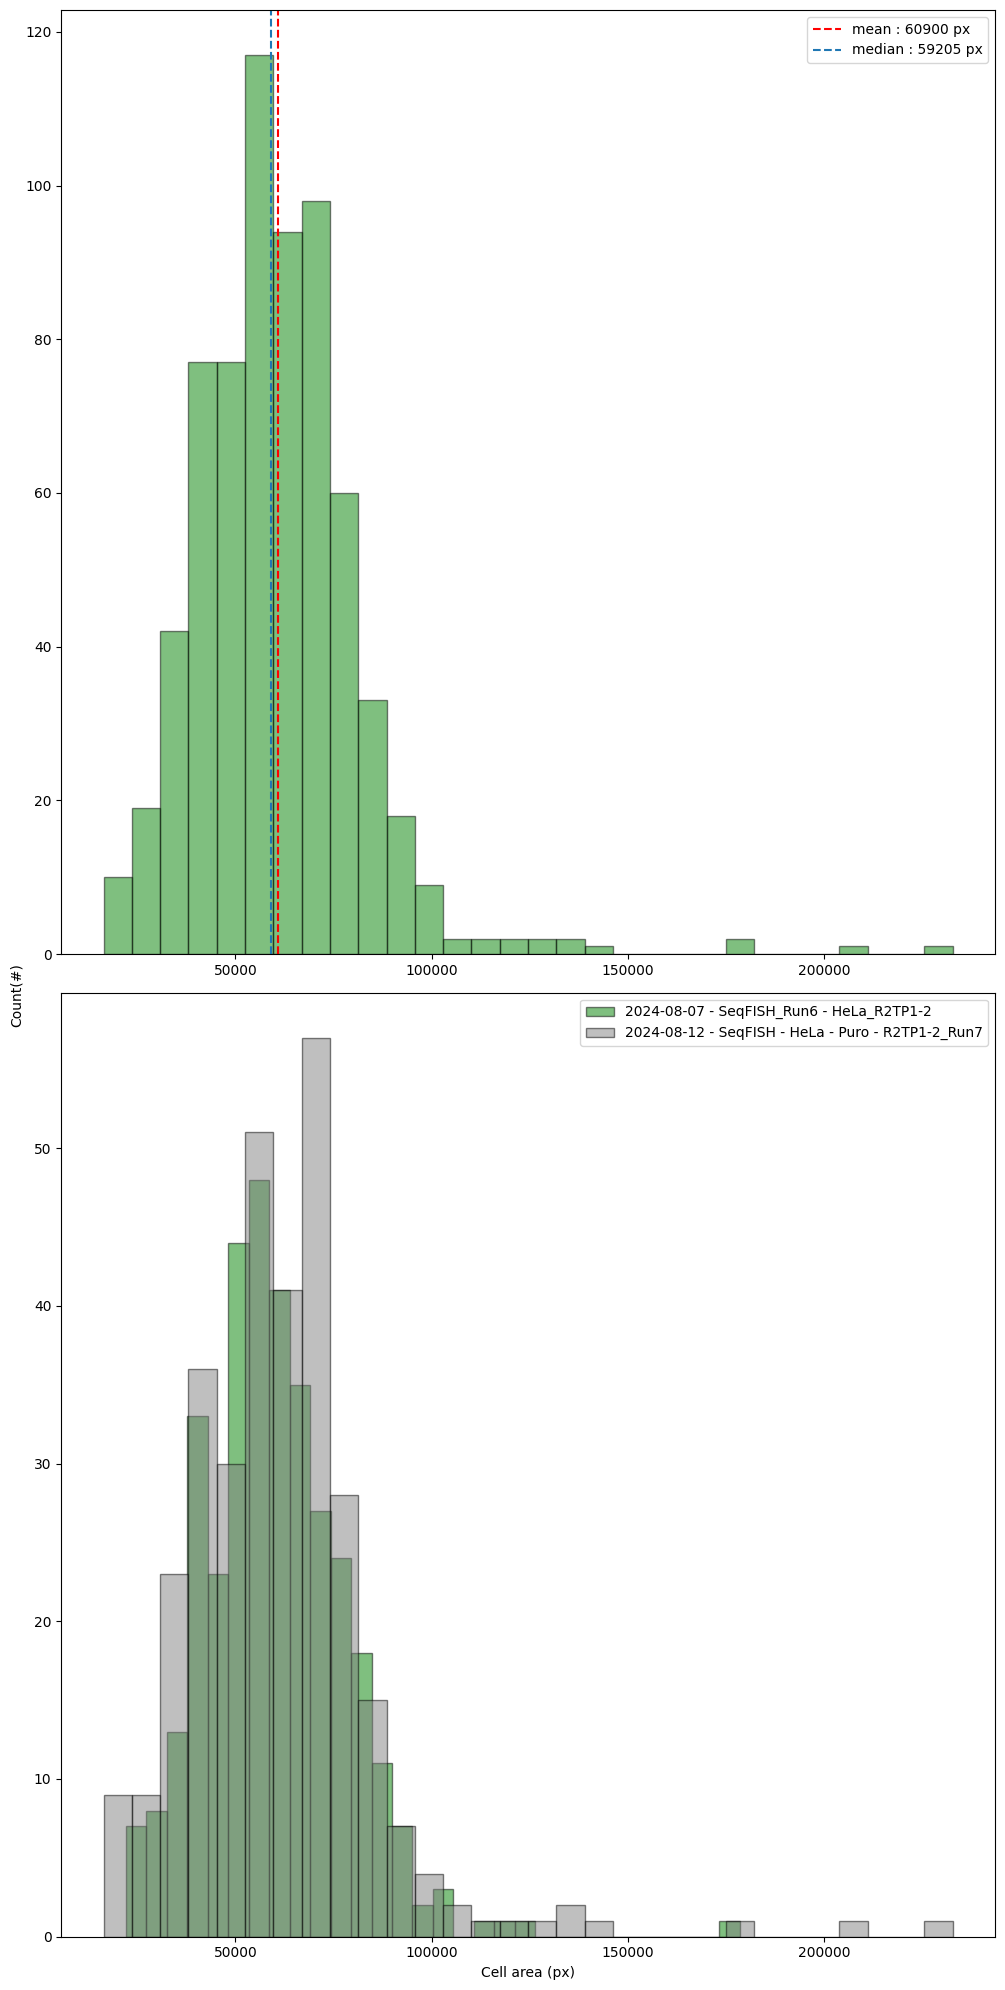

In [124]:
import os
def area_graph(
    Cell_data : pd.DataFrame,
) :
    
    fig = plt.figure(figsize=(10,20), frameon=True)
    top,bottom = fig.subplots(2,1)
    
    
    data = Cell_data.groupby(['path', 'cell_id'])['cell_area'].first()
    grouped_data = data.groupby('path', level=0).apply(list)
    colors = ['green','gray']
    
    for index, color in zip(grouped_data.index, colors) :
        sub_data = grouped_data.loc[index]
        bottom.hist(
        sub_data,
        bins=30,
        color=color,
        alpha = 0.5,
        label = os.path.basename(index),
        edgecolor = 'black',
        )
    
    bottom.legend()
    
    count,bins,_ = top.hist(
        data,
        bins=30,
        color='green',
        alpha = 0.5,
        edgecolor = 'black',
        )
    
    mean_area, median_area = data.mean(), data.median()
    xmin,xmax,ymin,ymax = top.axis()
    
    top.plot([mean_area,mean_area], [0, xmax], '--r', label= f'mean : {round(mean_area)} px')
    top.plot([median_area,median_area], [0, xmax], '--', label=f'median : {round(median_area)} px')
    
    top.axis([xmin,xmax,ymin,ymax])
    top.legend()
    
    bottom.set_xlabel('Cell area (px)')
    fig.text(0.00,0.5,"Count(#)", rotation=90, va='center')
    
    plt.tight_layout()
    return fig

fig = area_graph(Cell_data)

In [125]:
# save fig
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_RT2P/"
fig.savefig(f"{output_path}/cell_area.svg")

# Thresholds (+/- treatment)

## Load data

In [126]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data, safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [127]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-07 - SeqFISH_Run6 - HeLa_R2TP1-2/"  # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-12 - SeqFISH - HeLa - Puro - R2TP1-2_Run7/" # puro

In [128]:
Detection_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated", "puro"]) :

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Detection['treatment'] = treatment
    Detection['path'] = path
    
    Detection_data = pd.concat([
        Detection_data,
        Detection,
    ],axis=0)

In [129]:
Detection_data = Detection_data.loc[~Detection_data['target'].str.contains('Washout')]
Detection_data = Detection_data.loc[~(Detection_data['target'].isin(['POLR2A_16', 'empty1', 'empty2']))]
Detection_data = RNA_filtering(Detection_data)
Detection_data

,detection_id,acquisition_id,visual_name,filename,voxel_size,spot_size,alpha,beta,gamma,artifact_radius,...,Threshold_1,threshold,color_id,image_path,image_key,location,cycle,target,treatment,path
0,1,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,400,430,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,1,Location-01,0,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
1,39,1,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,400,430,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,39,Location-02,0,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
2,77,2,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,400,430,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,77,Location-03,0,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
3,115,3,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,400,430,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,115,Location-04,0,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
4,153,4,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,400,430,0,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,153,Location-05,0,POLR2A₀,untreated,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,139,112,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,330,330,1,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,139,Location-05,12,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
230,167,113,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,330,330,1,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,167,Location-06,12,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
231,195,114,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,330,330,1,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,195,Location-07,12,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...
232,223,115,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,"[200, 97, 97]","[300, 140, 140]",0.5,1,2,1400,...,330,330,1,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...,223,Location-09,12,AGO1,puro,/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/202...


## Rename targets

optional if targets needs renaming

In [130]:
rule = {
    'POLR2A₀' : 'POLR2A', 
}

Detection_data['target'] = Detection_data['target'].replace(rule)
Detection_data['target'].unique()

array(['POLR2A', 'POLR2B', 'POLR1A', 'POLR3A', 'PCF11', 'SCAF8', 'SCAF4',
       'CHERD', 'EP400', 'INO80', 'GTF3C1', 'SRCAP', 'AGO2', 'AGO1',
       'AGO4', 'AGO3', 'SNAPC4'], dtype=object)

    target  x_pos
0     AGO1      0
1     AGO2      1
2    CHERD      2
3    EP400      3
4   GTF3C1      4
5    INO80      5
6    PCF11      6
7   POLR1A      7
8   POLR2A      8
9   POLR2B      9
10  POLR3A     10
11   SCAF4     11
12   SCAF8     12
13   SRCAP     13
14    AGO3     14
15    AGO4     15
16  SNAPC4     16
here 
    treatment  target  len  threshold  x_pos
0       puro    AGO1    1        330      0
2       puro    AGO2    1        500      1
4       puro   CHERD    1        446      2
6       puro   EP400    1        556      3
8       puro  GTF3C1    1        300      4
10      puro   INO80    1        276      5
12      puro   PCF11    1        768      6
14      puro  POLR1A    1        598      7
16      puro  POLR2A    1        400      8
18      puro  POLR2B    1        400      9
20      puro  POLR3A    1        348     10
22      puro   SCAF4    1        666     11
24      puro   SCAF8    1        366     12
26      puro   SRCAP    1        240     13
here 
   

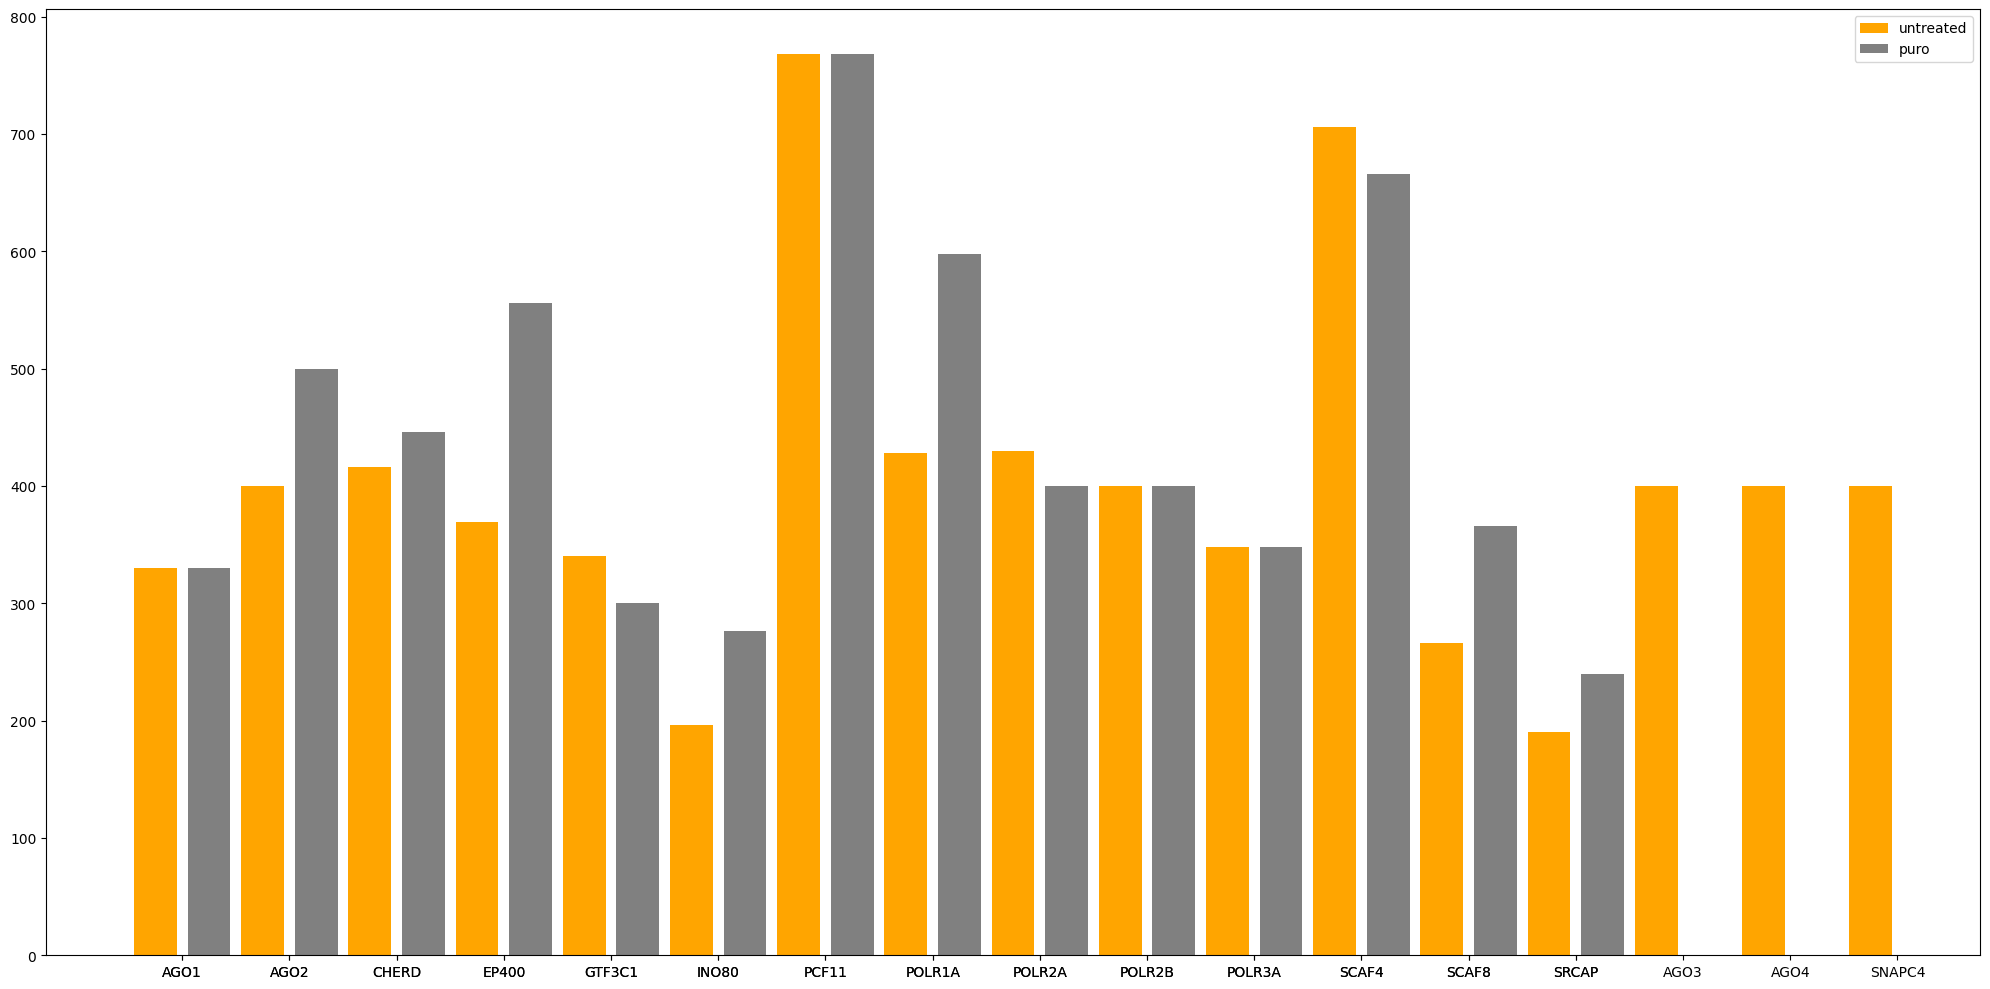

In [131]:
import matplotlib.pyplot as plt
import numpy as np

grouped_data = Detection_data.groupby(['treatment', 'target'])['threshold'].apply(pd.unique).apply(list).agg([len,list.pop])
grouped_data = grouped_data.rename(columns={'pop' : 'threshold'})
grouped_data = grouped_data.reset_index(drop=False)
assert (grouped_data['len'] == 1).all() #assert threshold is unique for (treatment,target)

threshold_fig = plt.figure(figsize=(20,10), frameon=True)
ax = threshold_fig.gca()



positions = pd.DataFrame({
    'target' : grouped_data['target'].unique(),
    'x_pos' : np.arange(len(grouped_data['target'].unique()))
})

check_len = len(grouped_data)
grouped_data = grouped_data.merge(positions, on='target')
unt_index = grouped_data[grouped_data['treatment'] == "untreated"].index
puro_index = grouped_data[grouped_data['treatment'] == "puro"].index
assert len(grouped_data) == check_len

print(positions)
# print("here \n",grouped_data[grouped_data['treatment'] == "puro"])
print("here \n",grouped_data.loc[puro_index])
print("here \n",grouped_data)

ax.bar(
    x=grouped_data.loc[unt_index]['x_pos'] - 0.25,
    height=grouped_data.loc[unt_index]['threshold'],
    color = 'orange',
    width= 0.4,
    label = 'untreated'
)

positons = np.arange(len(puro_index))
ax.bar(
    x=grouped_data.loc[puro_index]['x_pos'] + 0.25,
    height=grouped_data.loc[puro_index]['threshold'],
    color = 'gray',
    width= 0.4,
    label= 'puro'
)

ax.set_xticks(grouped_data['x_pos'] , grouped_data['target'])
ax.legend()

plt.tight_layout()
plt.show()


## save fig

In [132]:
import os
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_RT2P/"
folder_name = ""
os.makedirs(f"{output_path}/{folder_name}/", exist_ok=True)
threshold_fig.savefig(f"{output_path}/{folder_name}/thresholds.svg")


# Filtering statistics

## Load data

In [133]:
import pandas as pd
import os
from Sequential_Fish.analysis.distributions import merge_data, safe_merge_no_duplicates
from Sequential_Fish.analysis.post_processing import RNA_filtering

In [134]:
Run_1 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-07 - SeqFISH_Run6 - HeLa_R2TP1-2/"  # no puro
Run_2 = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/2024-08-12 - SeqFISH - HeLa - Puro - R2TP1-2_Run7/" # puro
output_path = "/mnt/ssd/SSD_floricslimani/Fish_seq/Davide/analyse_RT2P/"
folder_name = "filtering statistics"
os.makedirs(f"{output_path}/{folder_name}/", exist_ok=True)

In [135]:
Spots_data = pd.DataFrame()
Cell_data = pd.DataFrame()
for path, treatment in zip([Run_1, Run_2], ["untreated", "puro"]) :

    print(f"TREATMENT : ",treatment)

    Acquisition = pd.read_feather(path + "/result_tables/Acquisition.feather")
    Detection = pd.read_feather(path + "/result_tables/Detection.feather")
    Spots = pd.read_feather(path + "/result_tables/Spots.feather")
    Gene_map = pd.read_feather(path + "/result_tables/Gene_map.feather")
    Cell = pd.read_feather(path + "/result_tables/Cell.feather")
    
    Detection, Cell, Spots = merge_data(
        Acquisition=Acquisition,
        Detection=Detection,
        Cell=Cell,
        Spots=Spots,
        Gene_map=Gene_map
    )
    
    Spots['treatment'] = treatment
    Spots['path'] = path
    
    Cell['treatment'] = treatment
    Cell['path'] = path
    
    Spots_data = pd.concat([
        Spots_data,
        Spots,
    ],axis=0).reset_index(drop=True)
    
    Cell_data = pd.concat([
        Cell_data,
        Cell,
    ],axis=0).reset_index(drop=True)


TREATMENT :  untreated
TREATMENT :  puro


In [136]:
Gene_map = pd.read_feather(Run_2 + "/result_tables/Gene_map.feather").rename(columns={'target' : 'target_test'})
sample = Spots_data.loc[Spots_data['treatment'] == 'puro']
sample = safe_merge_no_duplicates(
    sample,
    Gene_map,
    on=['cycle','color_id'],
    keys= 'target_test'
)

In [137]:
test = sample.groupby(['cycle']).agg({
    'acquisition_id' : 'nunique',
    # 'cycle' : 'nunique',
    'color_id' : 'nunique',
    'target' : 'nunique',
    'target_test' : 'nunique',
})

print((test == 1).all(axis=0))
test

acquisition_id    False
color_id          False
target            False
target_test       False
dtype: bool


,acquisition_id,color_id,target,target_test
cycle,,,,
0,9,2,2,2
1,3,2,2,2
2,9,2,2,2
3,4,2,2,2
4,9,2,2,2
5,6,2,2,2
6,9,2,2,2
7,6,2,2,2
8,9,2,2,2


## Rename targets

optional if targets needs renaming

In [138]:
Spots_data.groupby(['treatment', 'cycle'])['target'].unique()

treatment  cycle
puro       0                    [POLR2A, POLR2B]
           1          [Washout_1_0, Washout_1_1]
           2                    [POLR1A, POLR3A]
           3          [Washout_3_0, Washout_3_1]
           4                      [PCF11, SCAF8]
           5          [Washout_5_0, Washout_5_1]
           6                      [SCAF4, CHERD]
           7          [Washout_7_0, Washout_7_1]
           8                      [EP400, INO80]
           9          [Washout_9_0, Washout_9_1]
           10                    [GTF3C1, SRCAP]
           11       [Washout_11_0, Washout_11_1]
           12                       [AGO2, AGO1]
           13       [Washout_13_0, Washout_13_1]
untreated  0                   [POLR2A₀, POLR2B]
           1          [Washout_1_1, Washout_1_0]
           2                    [POLR1A, POLR3A]
           3          [Washout_3_1, Washout_3_0]
           4                      [PCF11, SCAF8]
           5          [Washout_5_0, Washout_5_1]
   

In [139]:
rule = {
    'POLR2A₀' : 'POLR2A', 
}

Cell_data['target'] = Cell_data['target'].replace(rule)
Spots_data['target'] = Spots_data['target'].replace(rule)

## Washout filtering

In [140]:
washout_data = Spots_data.groupby(['treatment','cycle','target']).agg({
    'is_washout' : 'sum'
})

washout_data.loc['untreated']

is_washout
cycle target                  
0     POLR2A                 0
      POLR2B                 0
1     Washout_1_0            6
      Washout_1_1           16
2     POLR1A                 2
      POLR3A                13
3     Washout_3_0           14
      Washout_3_1           46
4     PCF11                  1
      SCAF8                  1
5     Washout_5_0            8
      Washout_5_1            9
6     CHERD                  2
      SCAF4                  0
7     Washout_7_0          309
      Washout_7_1          437
8     EP400                 64
      INO80                 16
9     Washout_9_0          631
      Washout_9_1          389
10    GTF3C1                84
      SRCAP                 40
11    Washout_11_0         368
      Washout_11_1          93
12    AGO1                  40
      AGO2                 129
13    Washout_13_0         177
      Washout_13_1         246
14    AGO3                  26
      AGO4                  30
15    Washout_15_0         270
      Washout_15_1          16
16    POLR2A_16             53
      SNAPC4                24
17    Washout_17_0          63
      Washout_17_1          52
18    empty1                14
      empty2                10

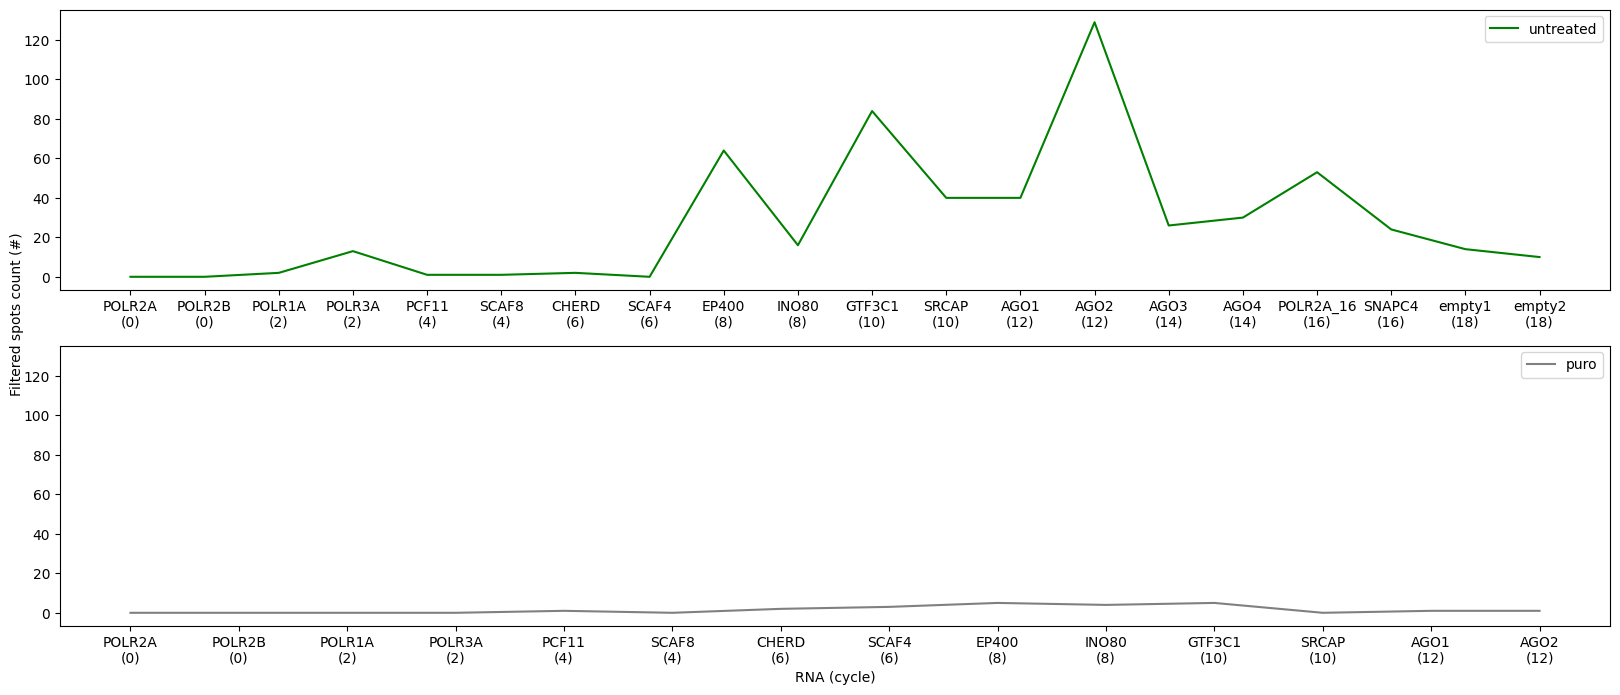

In [141]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8), frameon=True)

labels = ['untreated', 'puro']
colors = ['green', 'gray']

axes:'list[plt.Axes]' = fig.subplots(len(labels),1, sharey=True)

washout_are_uneven_numbers = True

if washout_are_uneven_numbers : modulo = 0 #then look for even numbers


for label, color, ax in zip(labels, colors, axes) :
    data = washout_data.loc[label]
    data = data[(data.index.get_level_values(0) %2 == modulo)]
    
    x = np.arange(len(data))
    y = data['is_washout']
    ax.plot(x,y,label=label,color=color)
    ax.legend()
    
    cycles = data.index.get_level_values(0)
    targets = data.index.get_level_values(1)
    xlabels = [f"{target}\n({cycle})" for target, cycle in zip(targets,cycles)]
    ax.set_xticks(x, xlabels)


fig.text(0.1, 0.5, 'Filtered spots count (#)', va='center', rotation='vertical')
ax.set_xlabel('RNA (cycle)')

fig.savefig(f"{output_path}/{folder_name}/washout_filter.svg")


## Cell (Segmentation) & Edge filtering

In [142]:
spots_count_per_cell = Spots_data.groupby(['treatment','location','cell_label']).agg({
    'spot_id' : 'count',
    'target' : 'nunique',
})
spots_count_per_cell

spot_id  target
treatment location    cell_label                 
puro      Location-01 0.0            1973      19
                      1.0             636      14
                      2.0             560      14
                      3.0             741      14
                      4.0             582      15
...                                   ...     ...
untreated Location-10 38.0           2271      19
                      39.0           2403      20
                      40.0           3319      19
                      41.0           3345      27
                      42.0           2825      19

[797 rows x 2 columns]

In [143]:
remaining_cells = Cell_data.rename(columns={"label" : "cell_label"}).groupby(['treatment','location','cell_label'])['cell_id'].nunique()
print((remaining_cells == 1).all())
remaining_cells

True


treatment  location     cell_label
puro       Location-01  1             1
                        3             1
                        4             1
                        5             1
                        6             1
                                     ..
untreated  Location-10  38            1
                        39            1
                        40            1
                        41            1
                        42            1
Name: cell_id, Length: 669, dtype: int64

In [144]:
spots_count_per_cell_before_filter = spots_count_per_cell.copy()
# spots_count_per_cell_after_filter = pd.merge(spots_count_per_cell, remaining_cells, how='inner',left_index=True, right_index=True)
spots_count_per_cell['not_on_edge'] = spots_count_per_cell.index.isin(remaining_cells.index)
spots_count_per_cell = spots_count_per_cell.rename(columns={'spot_id' : 'spot_count'})

In [145]:
spots_count_per_cell

spot_count  target  not_on_edge
treatment location    cell_label                                 
puro      Location-01 0.0               1973      19        False
                      1.0                636      14         True
                      2.0                560      14        False
                      3.0                741      14         True
                      4.0                582      15         True
...                                      ...     ...          ...
untreated Location-10 38.0              2271      19         True
                      39.0              2403      20         True
                      40.0              3319      19         True
                      41.0              3345      27         True
                      42.0              2825      19         True

[797 rows x 3 columns]

In [146]:
total_filtered = spots_count_per_cell[~spots_count_per_cell['not_on_edge']].groupby('treatment', level=0).agg({
    'spot_count' : ['sum', 'count']
})
total_filtered.columns = pd.Index(['spot_count','cell_count'])
total_filtered

,spot_count,cell_count
treatment,,
puro,57000,79
untreated,85894,49


In [147]:
total_remaining = spots_count_per_cell[spots_count_per_cell['not_on_edge']].groupby('treatment', level=0).agg({
    'spot_count' : ['sum', 'count']
})
total_remaining.columns = pd.Index(['spot_count','cell_count'])
total_remaining

,spot_count,cell_count
treatment,,
puro,317070,321
untreated,553153,348


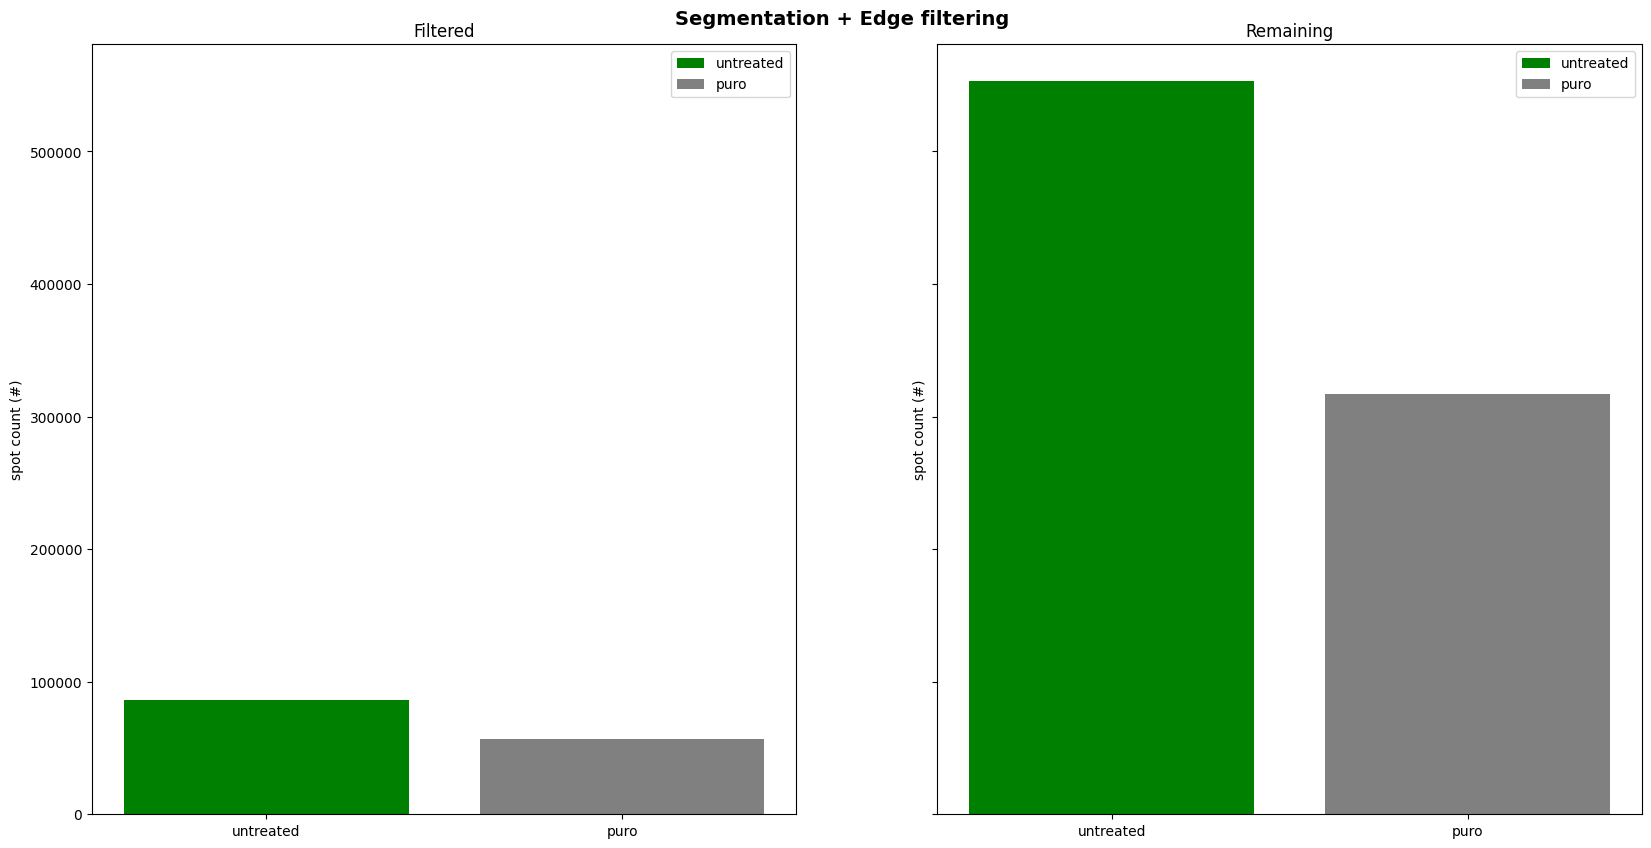

In [148]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10),frameon=True)
left,right = fig.subplots(1,2, sharey=True)

labels = ['untreated','puro']
colors = ['green','gray']

x = np.arange(len(labels))

left.bar(x,total_filtered.loc[labels]['spot_count'], color =colors, label= labels)
left.set_ylabel('spot count (#)')
left.legend()
left.set_xticks(x,labels)
left.set_title("Filtered")

right.bar(x,total_remaining.loc[labels]['spot_count'], color =colors, label= labels)
right.set_ylabel('spot count (#)')
right.legend()
right.set_xticks(x,labels)
right.set_title("Remaining")

fig.text(x=0.5, y=0.90, ha='center', s="Segmentation + Edge filtering", fontdict={'weight' : 'bold', 'size' : '14'})
fig.savefig(f"{output_path}/{folder_name}/Segmentation_spots_filtering.svg")

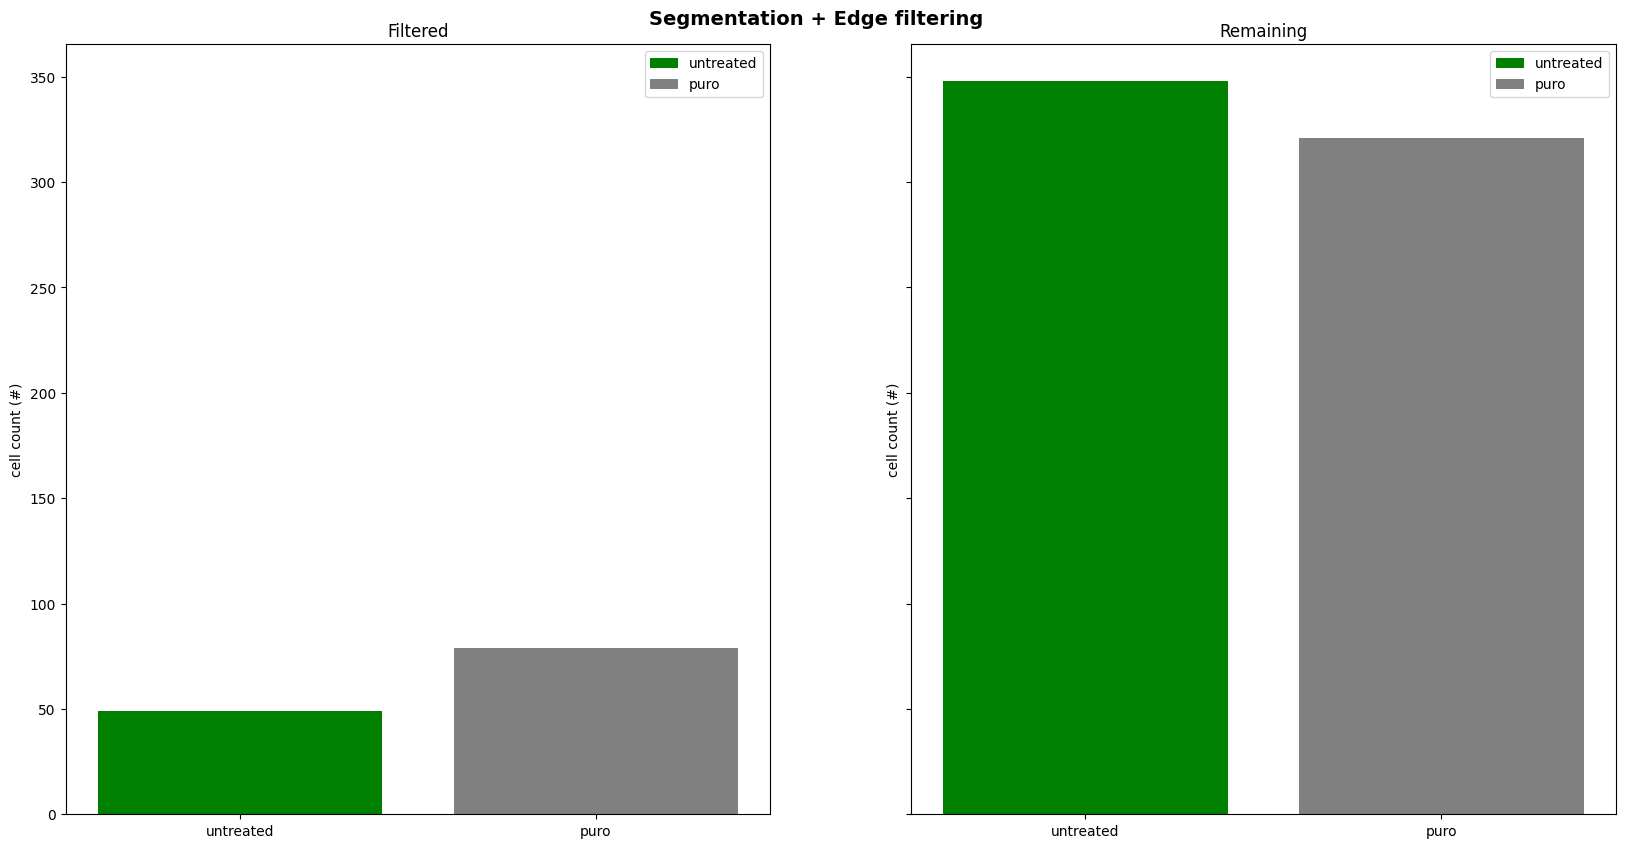

In [149]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10),frameon=True)
left,right = fig.subplots(1,2, sharey=True,)

labels = ['untreated','puro']
colors = ['green','gray']

x = np.arange(len(labels))

left.bar(x,total_filtered.loc[labels]['cell_count'], color =colors, label= labels)
left.set_ylabel('cell count (#)')
left.legend()
left.set_xticks(x,labels)
left.set_title("Filtered")

right.bar(x,total_remaining.loc[labels]['cell_count'], color =colors, label= labels)
right.set_ylabel('cell count (#)')
right.legend()
right.set_xticks(x,labels)
right.set_title("Remaining")

fig.text(x=0.5, y=0.90, ha='center', s="Segmentation + Edge filtering", fontdict={'weight' : 'bold', 'size' : '14'})
fig.savefig(f"{output_path}/{folder_name}/Segmentation_cells_filtering.svg")
